# Simple grid search univariate ARIMA model that accounts for seasonality

### Group : KC Crime Data G2

Analysis Based on https://medium.com/@josemarcialportilla/using-python-and-auto-arima-to-forecast-seasonal-time-series-90877adff03c

### File created: 6-24-2018



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# This is a a module that wraps the statsmodel arima model and performs grid search on the arima parameters
!pip install pyramid-arima

from pyramid.arima import auto_arima

C:\Users\jvaug_000\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


## Load data from local file storage


In [3]:
file_name = 'kcpd_crime_2009-2017_concat.csv'
df = pd.read_csv(file_name)

C:\Users\jvaug_000\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Examine the data ##

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1160598 entries, 0 to 1160597
Data columns (total 26 columns):
Report_No            1160598 non-null int64
Reported_Date        1160598 non-null object
Reported_Time        1160598 non-null object
From_Date            1158879 non-null object
From_Time            1158015 non-null object
To_Date              451534 non-null object
To_Time              475236 non-null object
Offense              1160598 non-null int64
IBRS                 1150867 non-null object
Description          1160598 non-null object
Beat                 1158023 non-null object
Address              1160456 non-null object
City                 1160442 non-null object
Zip Code             1137705 non-null float64
Rep_Dist             1156640 non-null object
Area                 1156613 non-null object
DVFlag               1160598 non-null object
Invl_No              1160598 non-null int64
Involvement          1160598 non-null object
Race                 1006582 non-nul

## Clean data 

In [5]:
#drop duplicate reports that don't have different Report_No, and IBRS codes
df_dropped = df.drop_duplicates(['Report_No','IBRS'])

In [6]:
# Drop rows that don't have a From_Date or From_Time
df_dropped = df_dropped.dropna(subset=['From_Date','From_Time','IBRS'])

In [7]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512173 entries, 0 to 1160572
Data columns (total 26 columns):
Report_No            512173 non-null int64
Reported_Date        512173 non-null object
Reported_Time        512173 non-null object
From_Date            512173 non-null object
From_Time            512173 non-null object
To_Date              209412 non-null object
To_Time              220100 non-null object
Offense              512173 non-null int64
IBRS                 512173 non-null object
Description          512173 non-null object
Beat                 511095 non-null object
Address              512167 non-null object
City                 512160 non-null object
Zip Code             501875 non-null float64
Rep_Dist             510474 non-null object
Area                 510466 non-null object
DVFlag               512173 non-null object
Invl_No              512173 non-null int64
Involvement          512173 non-null object
Race                 451973 non-null object
Sex       

## Set index to datetime index and resample IBRS counts by month

In [8]:
# Set From_Date column as index and convert it from string type to datetime type
df_final = df_dropped.set_index(['From_Date'])
df_final.index = pd.to_datetime(df_final.index)

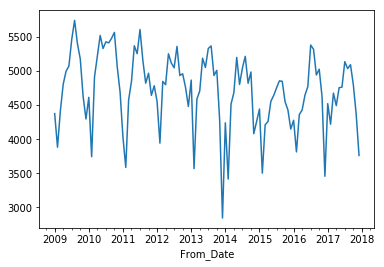

In [9]:
# Resample 'df_final' dataframe by month and IBRS count and create new dataframe 'data'
data = df_final[(df_final.index > '2008-12-31') ]['IBRS'].resample('M').count()

# Plot the timeseries
data.plot()
plt.show()

## Statsmodel Function Plotting the different components of the Time Series IBRS Counts


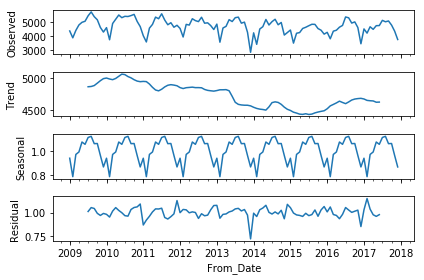

In [10]:
# Statsmodel decompose function to show the components of the monthly IBRS count timeseries
result = seasonal_decompose(data, model='multiplicative')
fig = result.plot()


## Generate model 

In [11]:
# Tunes hyperparameters for a best fit model according to AIC criterion

stepwise_model = auto_arima(data, start_p=1, start_q=1,
                            max_p=3, max_q=3, m=12,
                            start_P=0, seasonal=True,
                            d=1, D=1, trace=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1367.543, BIC=1380.953, Fit time=3.243 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1407.829, BIC=1418.557, Fit time=0.802 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1372.133, BIC=1382.861, Fit time=0.813 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1369.518, BIC=1385.611, Fit time=1.290 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1398.872, BIC=1409.601, Fit time=0.353 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1369.437, BIC=1385.530, Fit time=1.835 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=138

In [12]:
print("Best AIC fit for hyperparameters: ",stepwise_model.aic())

Best AIC fit for hyperparameters:  1367.5425733242762


## Split data into train and test sets

In [13]:
# Train and test data
train = data.loc['2009-01-01':'2015-12-31']
test = data.loc['2016-01-01':]

## Train model

In [14]:
# Train model
stepwise_model.fit(train)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 1, 1),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 1, 1, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

## Forecast future periods and Plot

In [15]:
# Forecast each period in this case is a month so 24 periods is two years
future_forecast = stepwise_model.predict(n_periods=24)
future_forecast

array([4092.74289617, 3219.35726952, 4084.45328103, 4243.54391199,
       4619.68541601, 4493.10182936, 4677.27851505, 4724.81056566,
       4445.25156004, 4421.46543533, 3925.90478838, 3546.30358708,
       3736.6034401 , 2937.692563  , 3823.64588912, 3986.88769538,
       4361.97506989, 4232.71548305, 4413.71082549, 4457.90407788,
       4174.95721418, 4147.76794528, 3648.79939131, 3265.78879897])

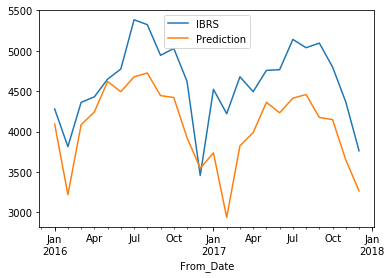

In [16]:
# Plotting just the time period where forecast were made along with truth value
future_forecast = pd.DataFrame(future_forecast, index = test.index, columns=['Prediction'])
pd.concat([test, future_forecast], axis=1).plot()

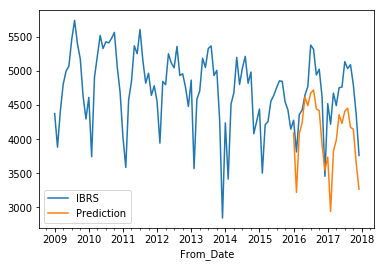

In [17]:
# Plot that includes all truth data and forecast for future IBRS monthly counts
pd.concat([data,future_forecast],axis=1).plot()